## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Read CSV

In [2]:
df = pd.read_csv("allyear.csv")

In [3]:
df.drop(['county'],axis=1,inplace=True)
df.reset_index()
df

,population,unemployedRate,povertyRate,medianIncome,avgmealmon,homeless,pplweekmon,drivealone,carpooled,publicTrans,walked,meanHouseIncome,yeshealth,privatehealth,publichealth,nohealth,POP_SNAP
0,263670,4.875,0.111,63389,3.43,357,62.840,100267,9897,4174,5923,93192,238684,167592,106540,22656,32072
1,932202,3.425,0.056,108827,4.00,271,45.530,323546,31853,82264,10764,147611,862372,706314,247591,64289,30301
2,445349,3.175,0.055,88797,3.49,518,39.550,185678,18855,6989,1733,114940,407683,345164,125525,19669,19123
3,506471,3.900,0.107,73672,3.58,603,58.000,188830,24875,15967,3665,100804,468706,344865,186648,32088,59120
4,92039,7.283,0.088,69980,3.71,90,72.600,32620,4167,232,2625,98993,83788,61367,40763,6102,6712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,63732,7.258,0.114,68830,3.53,38,86.770,24202,2597,201,466,88766,59606,45104,23619,3332,9325
101,329626,4.508,0.052,98440,3.41,342,43.307,134577,12021,8140,3684,132892,311777,274229,71082,18776,12874
102,143004,5.367,0.048,85086,3.58,57,50.034,64944,4956,1040,1145,109179,136333,115072,38680,6468,4735
103,549905,5.975,0.106,71163,3.02,504,54.202,177773,22037,34254,8130,102929,481160,361658,165957,69732,49795


## Variable Cutoff

In [4]:
# get all explanatory variable names
array = []
for col in df.columns:
    array.append(col)
del array[-1]

combos=[]
opvars = []

# unique combinations
x=0
for i in array[x:]:
    for j in array[x+1:]:
        column_1 = df[i]
        column_2 = df[j]
        combos.append((i,j))
    x=x+1
    
# variable cutoff
for i in combos:
    c1=df[i[0]]
    c2=df[i[1]]
    corr = abs(c1.corr(c2))
    if corr > 0.85:
        snapcol = df['POP_SNAP']
        corr_snap1 = abs(c1.corr(snapcol))
        corr_snap2 = abs(c2.corr(snapcol))
        if (corr_snap2>corr_snap1 and i[1] not in opvars):    # replacement function
            if (i[0] not in opvars):
                opvars.append(i[1])
            else:
                index = opvars.index(i[0])
                opvars[index] = i[1]
        elif (corr_snap1>corr_snap2 and i[0] not in opvars):
            if (i[1] not in opvars):
                opvars.append(i[0])
            else:
                index = opvars.index(i[1])
                opvars[index] = i[0]

print(opvars)

['carpooled', 'publichealth', 'nohealth', 'medianIncome', 'yeshealth', 'privatehealth', 'walked']


In [5]:
# set new dataframe with optimized variables and response variable POP_SNAP
opvars.append('POP_SNAP')
df = df[opvars]
df

,carpooled,publichealth,nohealth,medianIncome,yeshealth,privatehealth,walked,POP_SNAP
0,9897,106540,22656,63389,238684,167592,5923,32072
1,31853,247591,64289,108827,862372,706314,10764,30301
2,18855,125525,19669,88797,407683,345164,1733,19123
3,24875,186648,32088,73672,468706,344865,3665,59120
4,4167,40763,6102,69980,83788,61367,2625,6712
...,...,...,...,...,...,...,...,...
100,2597,23619,3332,68830,59606,45104,466,9325
101,12021,71082,18776,98440,311777,274229,3684,12874
102,4956,38680,6468,85086,136333,115072,1145,4735
103,22037,165957,69732,71163,481160,361658,8130,49795


## Multiple Linear Regression

In [6]:
x = df.drop(['POP_SNAP'],axis=1).values
y = df['POP_SNAP'].values

Text(0.5, 1.0, 'Method 4A')

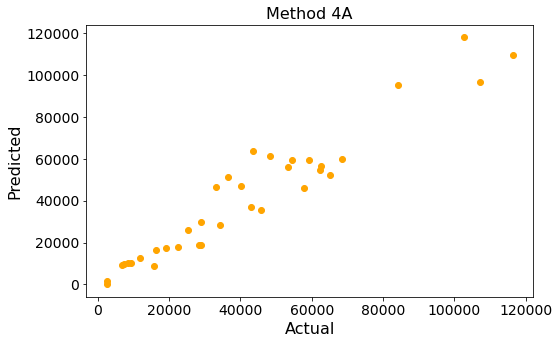

In [7]:
# splitting dataset into training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

# training model on training set
ml = LinearRegression()
ml.fit(x_train,y_train)

# predict test set results
y_pred=ml.predict(x_test)

plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,color="orange")
plt.xlabel('Actual', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Predicted', fontsize=16)
plt.title('Method 4A', fontsize=16)

In [8]:
# define our intput
X2 = sm.add_constant(x)

# create a OLS model
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     229.7
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           1.95e-57
Time:                        15:03:27   Log-Likelihood:                -1090.4
No. Observations:                 105   AIC:                             2197.
Df Residuals:                      97   BIC:                             2218.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.41e+04   5590.869      2.522      0.0